In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(400, 2) (400, 1)


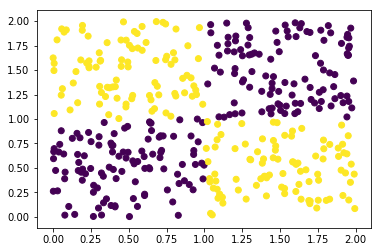

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']

### To fit the data we need 2 projection--->prediction

In [47]:
max_points = 2
lr=0.1

linear1 = tnn.WeightsLayer(2,2, optimizer=tnn.SGD(lr))
# linear1 = tsp.SplineMatrixLayer(2,2,max_points=2)
spline2 = tsp.SplineVectorLayer(2, max_points=max_points)
linear3 = tnn.NonLinearLayer(2,1, activation=tnn.Sigmoid(), optimizer=tnn.SGD(lr))
max_points = 3
for spline in spline2.spline_list:
    spline.n_max = max_points

loss_func = tnn.CrossEntropyBinary()

In [48]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
y_ = y.reshape(-1)
for step in range(100000):
    
    a1 = linear1.forward(x)
    a2 = spline2.forward(a1)
    yout = linear3.forward(a2)
    
    dy = loss_func.del_loss(yout, y)
    
    da2 = linear3.backward(dy)
    da1 = spline2.backward(da2)
    dx = linear1.backward(da1)

    linear1.update()
    spline2.update(lr)
    linear3.update()
    
    if step % 1000 == 0:
        splines = spline2.spline_list
        for spline in splines:
            spline._combine_linear_points_()
            spline._remove_close_points_()
            spline._remove_no_input_points_()
            spline._add_new_point_()
                
    if step % 100 == 0:
            
        error = loss_func.loss(yout, y)

        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (yout>0.5).astype(int)
        
        plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1))
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.727362445502923


_______________________
Steps 100
Error 0.6901001193414058


_______________________
Steps 200
Error 0.6796402912369173


_______________________
Steps 300
Error 0.6698749276787168


_______________________
Steps 400
Error 0.6562348916921468


_______________________
Steps 500
Error 0.636755013224078


_______________________
Steps 600
Error 0.6090747572970416


_______________________
Steps 700
Error 0.5730652382533695


_______________________
Steps 800
Error 0.5315612202221677


_______________________
Steps 900
Error 0.4898735985631751


_______________________
Steps 1000
Error 0.45344417375502233


_______________________
Steps 1100
Error 0.424662835289717


_______________________
Steps 1200
Error 0.40297149090403744


_______________________
Steps 1300
Error 0.3869156093462912


_______________________
Steps 1400
Error 0.3749854182889036


_______________________
Steps 1500
Error 0.36607754692082284


____________________

_______________________
Steps 13200
Error 0.3326573011487697


_______________________
Steps 13300
Error 0.33266150214607193


_______________________
Steps 13400
Error 0.3326656708176154


_______________________
Steps 13500
Error 0.33266980165239324


_______________________
Steps 13600
Error 0.3326738949308649


_______________________
Steps 13700
Error 0.33267794879911156


_______________________
Steps 13800
Error 0.3326819597296605


_______________________
Steps 13900
Error 0.3326859238342085


_______________________
Steps 14000
Error 0.3326898398590678


_______________________
Steps 14100
Error 0.33269370649667834


_______________________
Steps 14200
Error 0.3326975218868857


_______________________
Steps 14300
Error 0.3327012834920111


_______________________
Steps 14400
Error 0.3327048592325664


_______________________
Steps 14500
Error 0.3327084744109058


_______________________
Steps 14600
Error 0.33271215499970763


_______________________
Steps 14700
Error 0.332715

_______________________
Steps 26200
Error 0.32741833349070837


_______________________
Steps 26300
Error 0.32715907982642795


_______________________
Steps 26400
Error 0.3268534746116498


_______________________
Steps 26500
Error 0.32653293689202245


_______________________
Steps 26600
Error 0.3261825381121859


_______________________
Steps 26700
Error 0.32581129966385275


_______________________
Steps 26800
Error 0.3253960687640854


_______________________
Steps 26900
Error 0.32492852920313114


_______________________
Steps 27000
Error 0.3244255649522566


_______________________
Steps 27100
Error 0.3238081038249424


_______________________
Steps 27200
Error 0.323117116510875


_______________________
Steps 27300
Error 0.3222250102277917


_______________________
Steps 27400
Error 0.32108454183463053


_______________________
Steps 27500
Error 0.31966830166628823


_______________________
Steps 27600
Error 0.3176118662998215


_______________________
Steps 27700
Error 0.31449



_______________________
Steps 39200
Error 0.04542371713603236


_______________________
Steps 39300
Error 0.04511287133439419


_______________________
Steps 39400
Error 0.044818169207913934


_______________________
Steps 39500
Error 0.044526422101936775


_______________________
Steps 39600
Error 0.04425110288528259


_______________________
Steps 39700
Error 0.043969738533792914


_______________________
Steps 39800
Error 0.04369237136958781


_______________________
Steps 39900
Error 0.04342041593526076


_______________________
Steps 40000
Error 0.0431535654454098


_______________________
Steps 40100
Error 0.04289117268909673


_______________________
Steps 40200
Error 0.042633401747183525


_______________________
Steps 40300
Error 0.042379463782794745


_______________________
Steps 40400
Error 0.04212900361813321


_______________________
Steps 40500
Error 0.0418823347623185


_______________________
Steps 40600
Error 0.04163883215703207


_______________________
Steps 40700



_______________________
Steps 53900
Error nan


_______________________
Steps 54000
Error nan


_______________________
Steps 54100
Error nan


_______________________
Steps 54200
Error nan


_______________________
Steps 54300
Error nan


_______________________
Steps 54400
Error nan


_______________________
Steps 54500
Error nan


_______________________
Steps 54600
Error nan


_______________________
Steps 54700
Error nan


_______________________
Steps 54800
Error nan


_______________________
Steps 54900
Error nan


_______________________
Steps 55000
Error nan


_______________________
Steps 55100
Error nan


_______________________
Steps 55200
Error nan


_______________________
Steps 55300
Error nan


_______________________
Steps 55400
Error nan


_______________________
Steps 55500
Error nan


_______________________
Steps 55600
Error nan


_______________________
Steps 55700
Error nan


_______________________
Steps 55800
Error nan


_______________________
Steps 55900
Er



_______________________
Steps 71000
Error nan


_______________________
Steps 71100
Error nan


_______________________
Steps 71200
Error nan


_______________________
Steps 71300
Error nan


_______________________
Steps 71400
Error nan


_______________________
Steps 71500
Error nan


_______________________
Steps 71600
Error nan


_______________________
Steps 71700
Error nan


_______________________
Steps 71800
Error nan


_______________________
Steps 71900
Error nan


_______________________
Steps 72000
Error nan


_______________________
Steps 72100
Error nan


_______________________
Steps 72200
Error nan


_______________________
Steps 72300
Error nan


_______________________
Steps 72400
Error nan


_______________________
Steps 72500
Error nan


_______________________
Steps 72600
Error nan


_______________________
Steps 72700
Error nan


_______________________
Steps 72800
Error nan


_______________________
Steps 72900
Error nan


_______________________
Steps 73000
Er



_______________________
Steps 88100
Error nan


_______________________
Steps 88200
Error nan


_______________________
Steps 88300
Error nan


_______________________
Steps 88400
Error nan


_______________________
Steps 88500
Error nan


_______________________
Steps 88600
Error nan


_______________________
Steps 88700
Error nan


_______________________
Steps 88800
Error nan


_______________________
Steps 88900
Error nan


_______________________
Steps 89000
Error nan


_______________________
Steps 89100
Error nan


_______________________
Steps 89200
Error nan


_______________________
Steps 89300
Error nan


_______________________
Steps 89400
Error nan


_______________________
Steps 89500
Error nan


_______________________
Steps 89600
Error nan


_______________________
Steps 89700
Error nan


_______________________
Steps 89800
Error nan


_______________________
Steps 89900
Error nan


_______________________
Steps 90000
Error nan


_______________________
Steps 90100
Er

TclError: invalid command name "pyimage199"

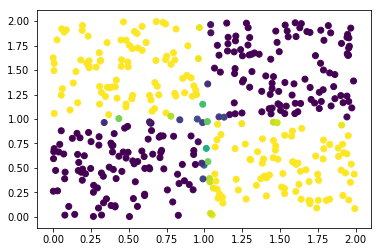

In [49]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1))

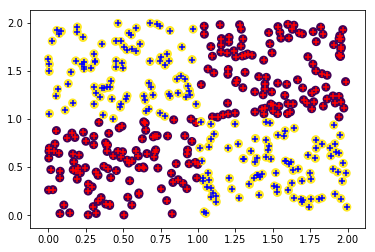

In [50]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [51]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

a1 = linear1.forward(xxyy)
a2 = spline2.forward(a1)
Y = linear3.forward(a2)

out = (Y>0.5).astype(int)

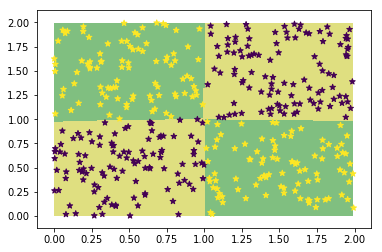

In [52]:
plt.imshow(out.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

In [53]:
## visualizing the layers and backwarding the pivot points

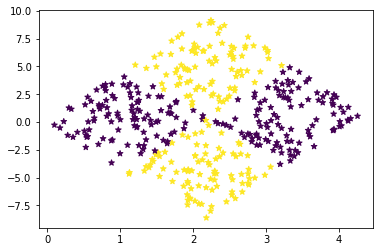

In [109]:
a1 = linear1.forward(x)
a2 = spline2.forward(a1)
yout = linear3.forward(a2)

out = (yout>0.5).astype(int)
plt.scatter(a1[:,0], a1[:, 1], c=y.reshape(-1), marker='*')

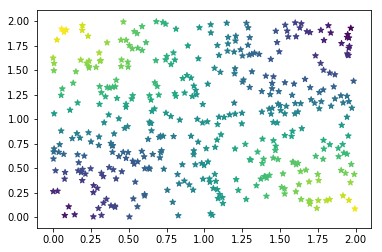

In [110]:
plt.scatter(x[:,0], x[:, 1], c=linear3.zee.reshape(-1), marker='*')

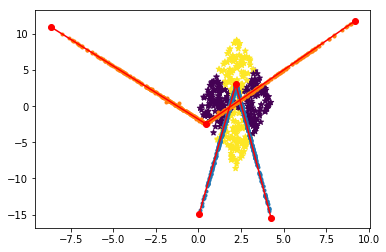

In [112]:
plt.scatter(a1[:,0], a1[:, 1], c=y.reshape(-1), marker='*')

spline = spline2.spline_list[0]
plt.scatter(spline.input, spline.output-spline.del_output, marker='.')
plt.plot(spline.X, spline.Y, marker='o', c='r')

spline = spline2.spline_list[1]
plt.scatter(spline.input, spline.output-spline.del_output, marker='.')
plt.plot(spline.X, spline.Y, marker='o', c='r')

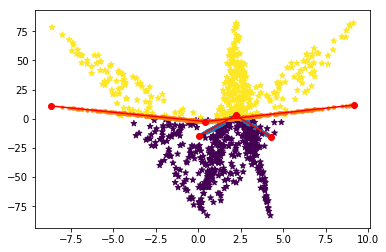

In [118]:
plt.scatter(a1[:,0], linear3.zee, c=y.reshape(-1), marker='*')

spline = spline2.spline_list[0]
plt.scatter(spline.input, spline.output-spline.del_output, marker='.')
plt.plot(spline.X, spline.Y, marker='o', c='r')

plt.scatter(a1[:,1], linear3.zee, c=y.reshape(-1), marker='*')

spline = spline2.spline_list[1]
plt.scatter(spline.input, spline.output-spline.del_output, marker='.')
plt.plot(spline.X, spline.Y, marker='o', c='r')

In [78]:
## backwarding all pivot points to input space

In [79]:
inv_linear1 = np.linalg.pinv(linear1.weights)
inv_linear1.shape

(2, 2)

In [83]:
inv_linear1[:1, :].shape

(1, 2)

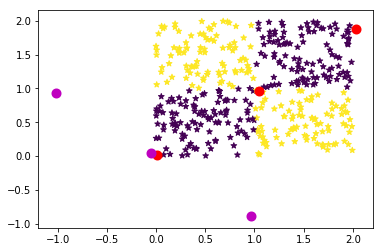

In [94]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

spline = spline2.spline_list[0]
sp0x_back = spline.X.reshape(-1,1)@inv_linear1[:1, :]
plt.scatter(sp0x_back[:,0], sp0x_back[:, 1], c='r', marker='o', lw=4)

spline = spline2.spline_list[1]
sp1x_back = spline.X.reshape(-1,1)@inv_linear1[1:, :]
plt.scatter(sp1x_back[:,0], sp1x_back[:, 1], c='m', marker='o', lw=4)

In [107]:
## forwarding the collected input pivot points

In [119]:
pivX = np.vstack((sp0x_back,sp1x_back))
pivX.shape

(6, 2)

In [120]:
piva1 = linear1.forward(pivX)
piva2 = spline2.forward(piva1)
pivyout = linear3.forward(piva2)
pivyout

array([[5.57735862e-35],
       [9.65657108e-01],
       [6.59558691e-36],
       [2.28743309e-02],
       [4.28141204e-37],
       [7.37398220e-01]])

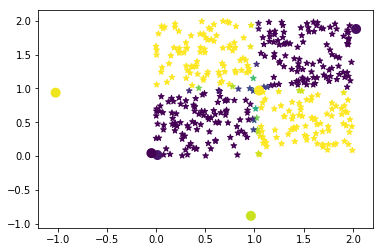

In [121]:
plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1), marker='*')
plt.scatter(pivX[:,0], pivX[:, 1], c=linear3.zee.reshape(-1), marker='o', lw=4)

In [67]:
def _calculate_rangeY_(self:tsp.Spline1D, y):
    rangeY = np.zeros((self.n_points-1, y.shape[0]))
    
    def _inrange2_(X, break0, break1): #if x is after
        xmsk1 = X >= break0
        xmsk2 = X < break1
        xmsk12 = np.bitwise_and(xmsk1, xmsk2)
        xmsk3 = X < break0
        xmsk4 = X >= break1
        xmsk34 = np.bitwise_and(xmsk3, xmsk4)
        xs = np.bitwise_or(xmsk12, xmsk34)
        return xs

    for i in range(self.n_points-1):
        if self.n_points-2 == 0:
            rangeY[i] = _inrange2_(y, -np.inf, np.inf)
        elif i==0:
            sign = -1 if self.Y[0]<self.Y[1] else 1
            rangeY[i] = _inrange2_(y, sign*np.inf, self.Y[1])
        elif i== self.n_points-2:
            sign = 1 if self.Y[i]<self.Y[i+1] else -1
            rangeY[i] = _inrange2_(y, self.Y[i], sign*np.inf)
        else:
            rangeY[i] = _inrange2_(y, self.Y[i], self.Y[i+1])
    notInRange = np.where(rangeY.sum(axis=0) == 0)[0]
    #### for the values of y that are missed by the whole curve
    rangeY[:, notInRange] = self.rangeX[:, notInRange]
    return rangeY

def reverse1(self:tsp.Spline1D, y, rangeY=None):
    if rangeY is None:
        rangeY = _calculate_rangeY_(self, y)
        
    x = np.zeros((self.n_points-1, len(y)))
    for i in range(len(y)-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x[i] = xpossible*rangeY[i]
    return x